# Python - sklearn, jupyter로 Decision Tree 학습하기

### REF:
- scikit-learn의 공식 튜토리얼 문서자료
- [Python Machine Learning]을 참고
- [데이터 사이언스 스쿨](https://datascienceschool.net/view-notebook/16c28c8c192147bfb3d4059474209e0a/)



- 파이썬에서 sklearn 모듈을 사용해서 의사결정 트리를 학습하는 과정은 R에 비하면 약간 덜 직관적
- 조금 더 객체지향스러운 프로그래밍의 느낌
- DecisionTreeClassifier라는 일종의 모델 helper를 사용하여 학습이 진행됨
- X,Y 데이터셋을 fit이라는 함수에 입력하는 간단한 절차를 거치면, 학습이 완료됨

#### 패키지 설치

- python
- NumPy
- pandas
- SciPy

등 패키지들은 이미 설치되었다고 가정


##### pip
```pip install -U scikit-learn```

##### anaconda
```conda install scikit-learn```



In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

모델 predict

In [2]:
clf.predict([[2., 2.]])

array([1])

In [40]:
clf.predict([[2.,2.]])

array([1])


# iris 데이터
- 이제 iris 데이터로 Decision Tree를 테스트 해보자.
- 이 예제에서는 독립변수 공간을 공간상에 표시하기 위해 꽃받침의 길이와 폭만을 독립변수로 사용하였다.
#### 전처리

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### 트리 학습

In [8]:
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

#### Test & accuary 
- 학습된 모델을 test 데이터로 테스트해본 뒤, accuracy를 구해본다

In [6]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.98


#### 시각화

### graphviz 설치

- 트리의 장점은 역시 학습 모델을 시각화하여 볼 수 있다는 점이다.

- 이 과정을 하기 전에, graphviz라는 것을 설치해줘야 한다. mac의 경우 homebrew를 사용하여 간단하게 설치

- 윈도우의 경우 공식 다운로드 페이지에서 다운로드를 받은 뒤, 환경 변수를 간단하게 설정해주면 된다.

[graphviz 공식 홈페이지](https://graphviz.gitlab.io/_pages/Download/Download_windows.html
- 들어가서 윈도우용 설치

- Path 에 추가 
- ```C:\Program Files(x86)\Graphviz2.38\bin```

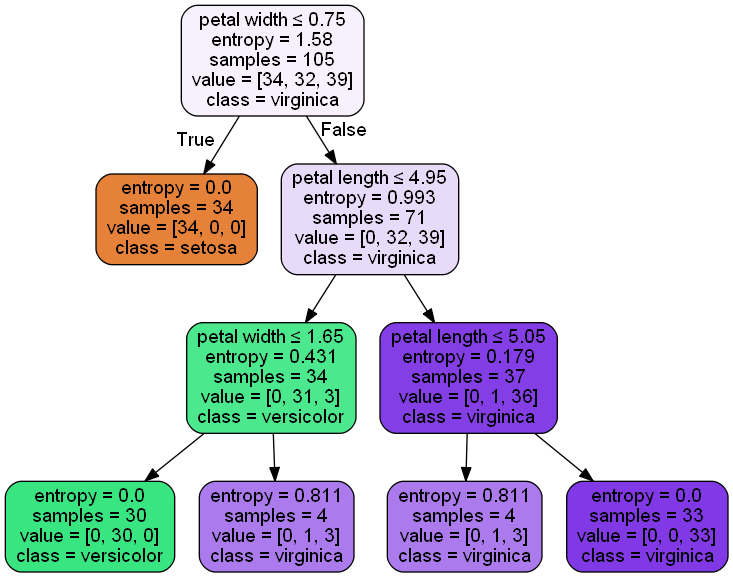

In [7]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(iris_tree, out_file=None
                           , feature_names=['petal length', 'petal width']
                           , class_names=iris.target_names
                           , filled=True, rounded=True
                           , special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

graphviz 를 사용하면 위의 이미지처럼 직관적인 색으로 그룹을 분류까지 해준다. 

#### 함수 구현

의사결정나무를 시각화 하기 위한 코드
- ``` draw_dicision_tree``` 함수는 의사결정 나무의 의사결정과정의 세부적인 내역을 다이어그램으로 보여주고  ```plot_decision_regions``` 함수는 이런 의사결정에 의해 데이터의 영역이 어떻게 나뉘어졌는지를 시각화하여 보여준다. 


In [9]:
from sklearn.tree import DecisionTreeClassifier
# scikit-learn . tree 에서 DecisionTreeClassifier 를 가져온다. 

tree1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=1, random_state = 0).fit(X,y)
# tree1 을 만든다. entropy 계수를 이용하여 
# 분리 변수가 범주형인 경우 적절한 분리기준(카이제곱 통계량의 p값, 지니지수, 엔트로피짓수) 
# 엔트로피 지수 : shannon entropy 라고도 하는데 주어진 집단의 혼잡도(불확실성)을 나타내는 수치다. 


In [10]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


In [11]:
def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


In [12]:
def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

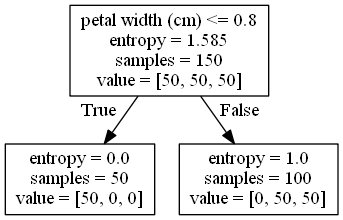

In [13]:
draw_decision_tree(tree1)

In [ ]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]], dtype=int64)

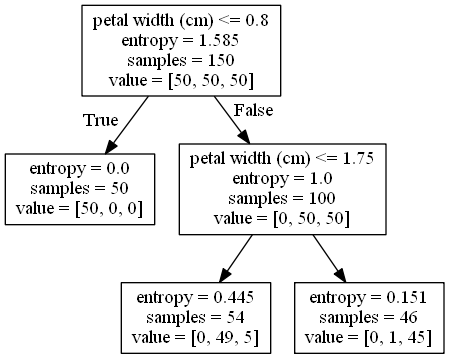

In [18]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)

draw_decision_tree(tree2)


In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


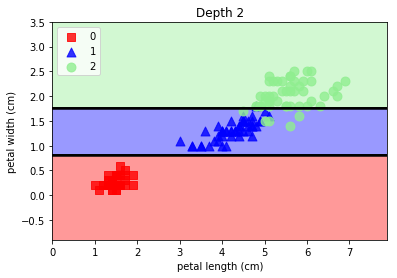

In [36]:

plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

In [20]:
confusion_matrix(y, tree2.predict(X))


array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

In [21]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)


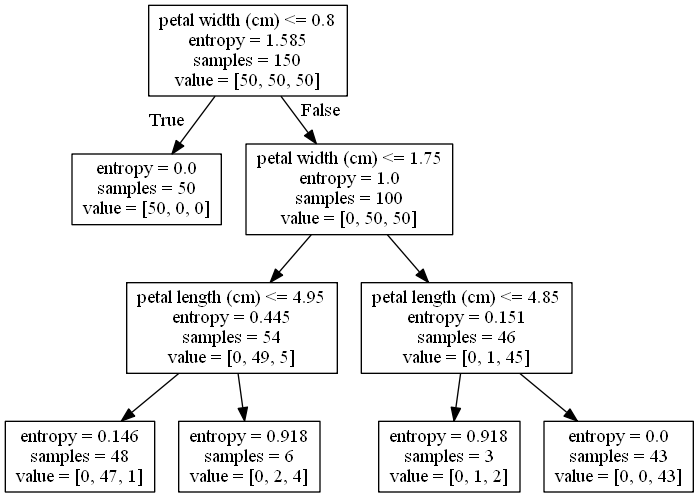

In [22]:
draw_decision_tree(tree3)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


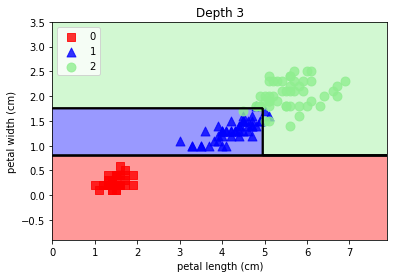

In [37]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

In [24]:
confusion_matrix(y, tree3.predict(X))


array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

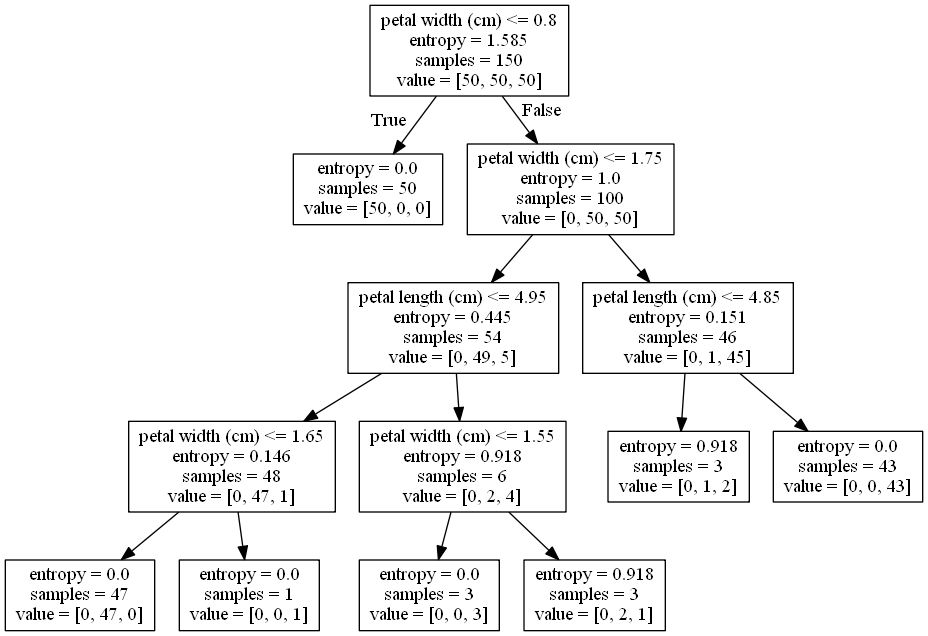

In [25]:
tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(X, y)

draw_decision_tree(tree4)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


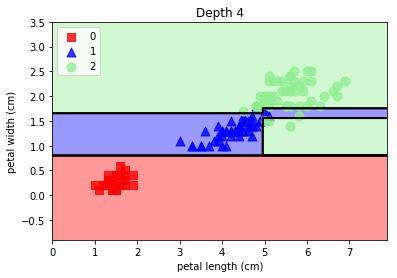

In [38]:
plot_decision_regions(X, y, tree4, "Depth 4")
plt.show()

In [27]:
confusion_matrix(y, tree4.predict(X))


array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)